In [12]:
import pandas as pd
import glob

In [13]:
path_train = './data/train'
path_test = './data/test'

# Базовый анализ данных

In [14]:
filenames_train = glob.glob(path_train + "/*.csv")
data_files_train = []

for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))
    print(f"completed {filename}")
    # Рассмотрим 1 файл
    break

train_data = pd.concat(data_files_train, ignore_index=True)
del data_files_train, filenames_train

completed ./data/train\train_1-006.csv


In [15]:
display('Размерность полных тренировочных данных составляет: {} строк и {} столбца'.format(*train_data.shape))
display(train_data.head())
display(train_data['smpl'].value_counts())

'Размерность полных тренировочных данных составляет: 449046 строк и 503 столбца'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,feature_500
0,0,train,0,0.372342,1.500852,2.133451,-0.957384,-0.119022,0.122920,0.150993,...,-1.254497,0.0,0.803635,-1.017931,-0.521130,0.647188,1.453860,-0.833480,0.184028,-0.438225
1,0,train,1,0.382215,0.962629,-0.192558,-1.019986,-1.330412,-0.100149,-1.131326,...,-0.884458,0.0,-1.643735,-1.264842,-1.523788,0.604948,0.491954,-0.003686,0.469720,-1.094604
2,0,train,2,0.472528,-0.695334,0.537968,-0.033000,-0.364850,-0.441849,-0.035953,...,-0.322682,0.0,-0.496765,-0.051931,0.743209,-1.395109,0.147941,-0.007553,-0.981296,0.270930
3,0,train,3,0.512260,-1.231960,0.555326,1.456647,1.435358,0.168613,-0.628737,...,0.976566,0.0,1.183049,-0.178662,1.468147,-0.791254,0.000645,0.674715,0.803094,1.037068
4,0,train,4,1.487986,-0.164392,-1.197163,1.549057,0.952673,1.144201,-0.964000,...,-1.655236,0.0,1.076122,-0.555735,1.248728,-0.485943,0.458768,-0.444558,-0.333710,0.380206


train    449046
Name: smpl, dtype: int64

In [16]:
features = [col for col in train_data.columns if col not in ['target', 'smpl', 'id']]

In [17]:
train_data['target'].value_counts(normalize=True)

0    0.988449
1    0.011551
Name: target, dtype: float64

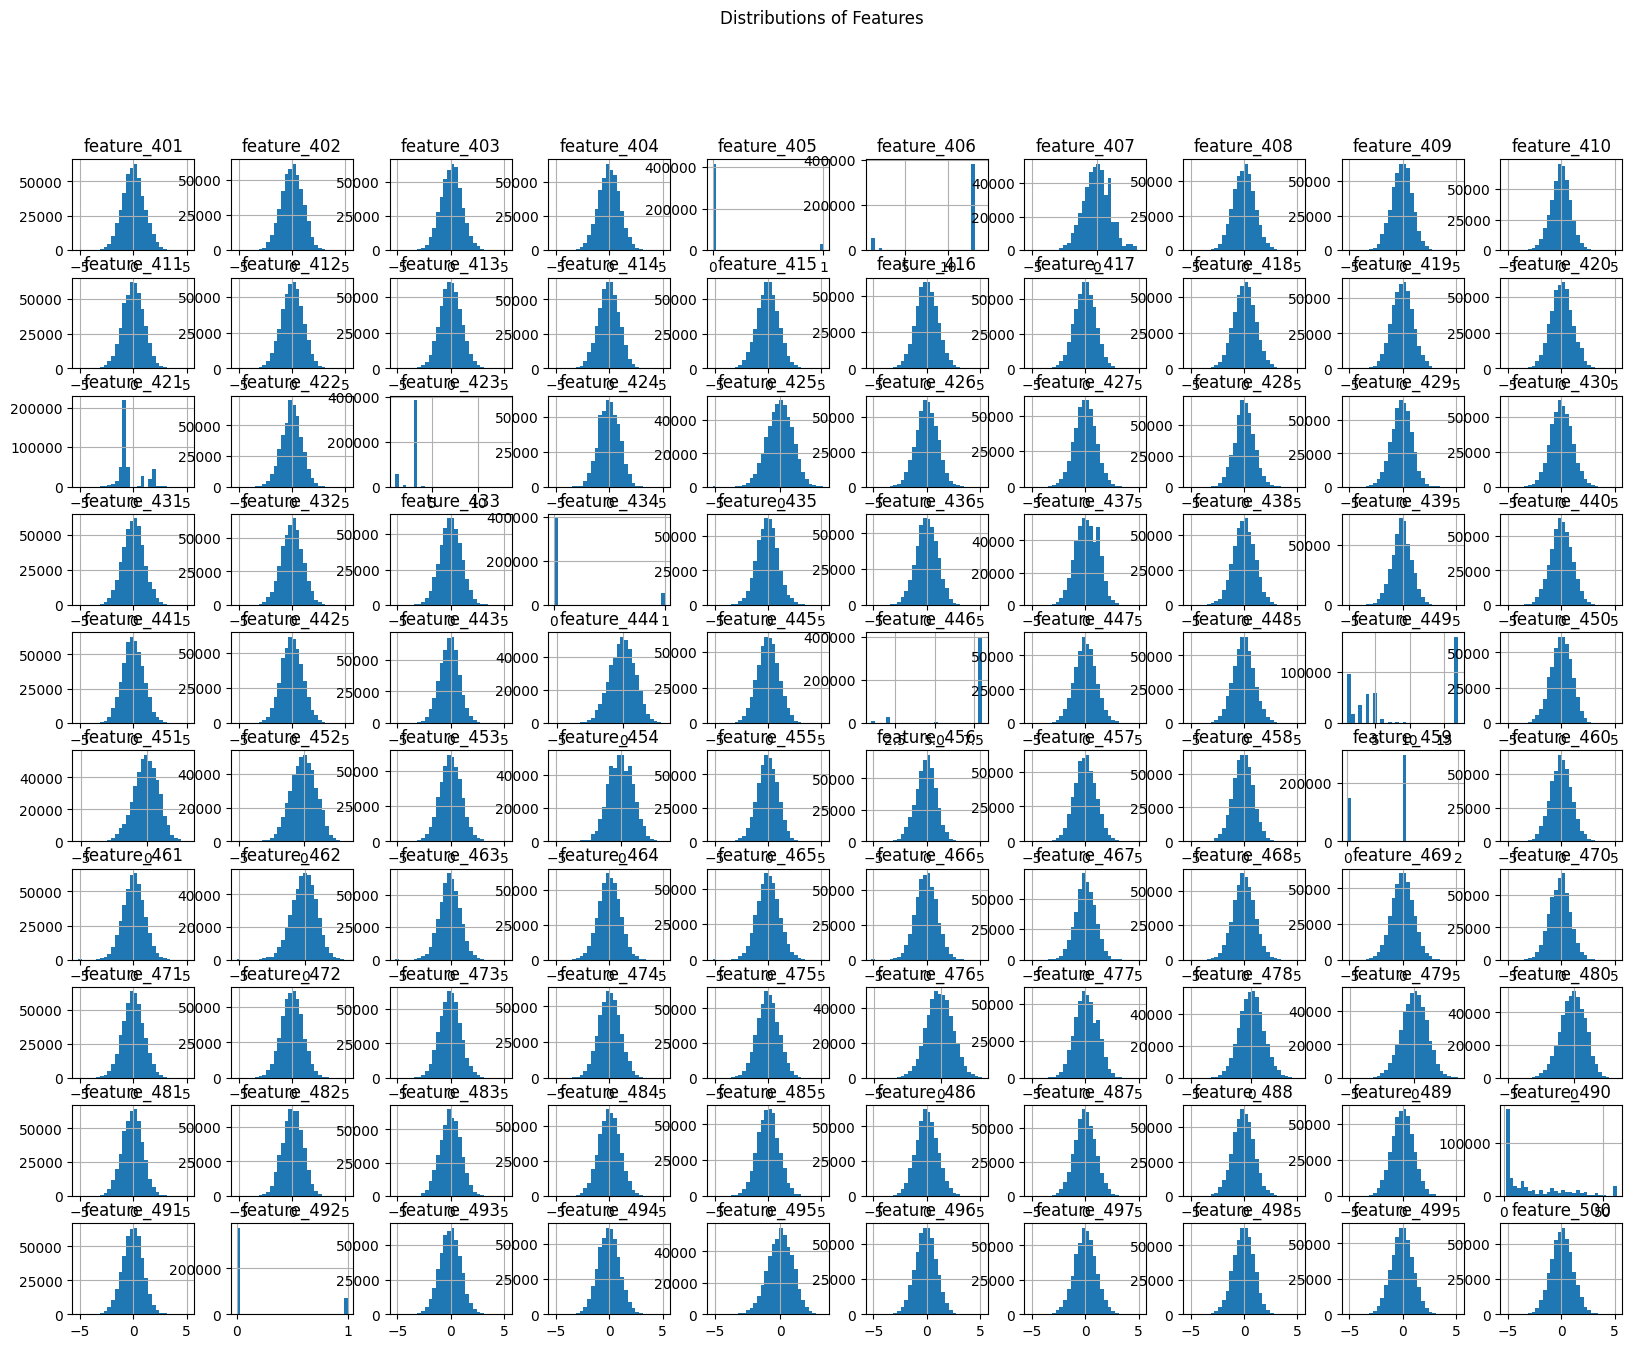

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data[features[400:500]].hist(bins=30, figsize=(20, 15))
plt.suptitle("Distributions of Features")
plt.show()

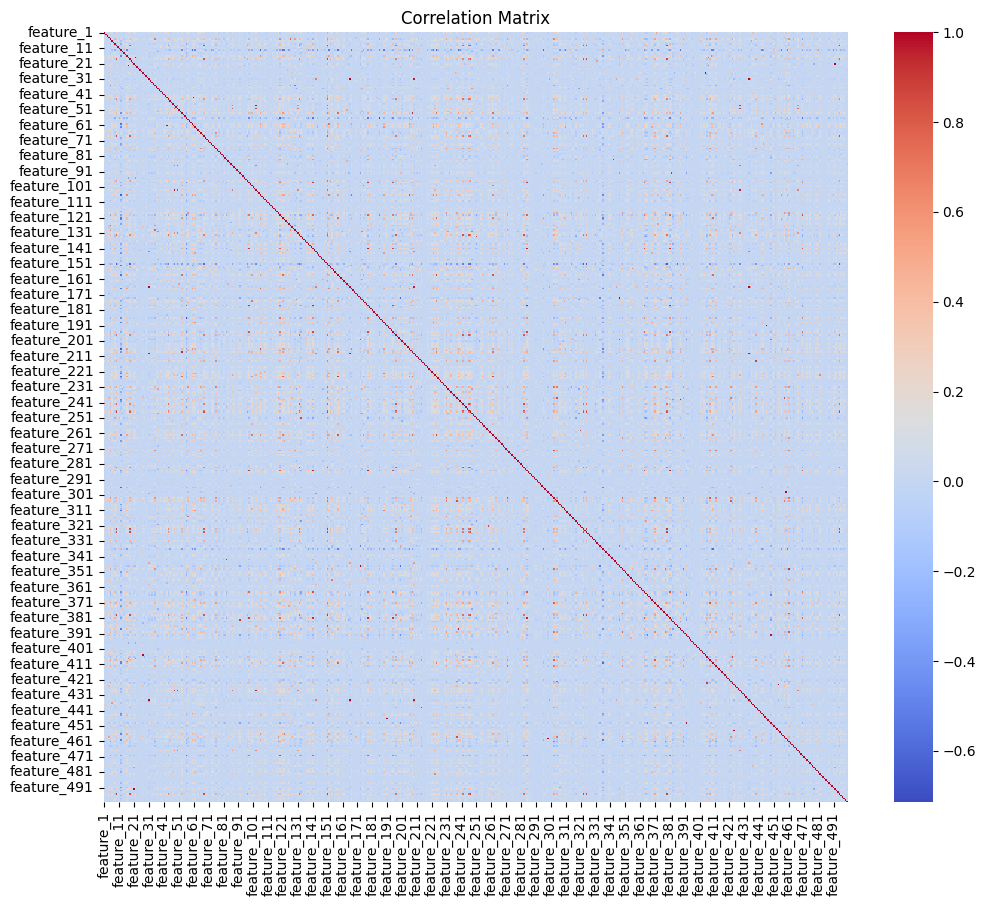

Features with low variance: Index(['target', 'feature_27', 'feature_43', 'feature_61', 'feature_405'], dtype='object')


In [19]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.drop(columns=["target", "smpl", "id"]).corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

variances = train_data.drop(columns=["smpl", "id"]).var()
low_variance_features = variances[variances < 0.1].index

print("Features with low variance:", low_variance_features)

- Дисбаланс классов
- наличие категориальных признаков